(2, 4, 100)


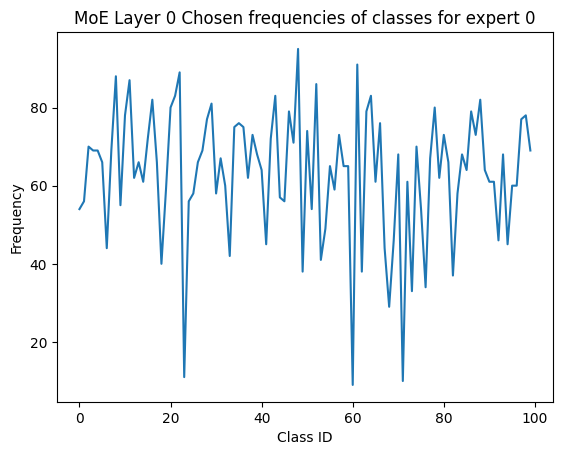

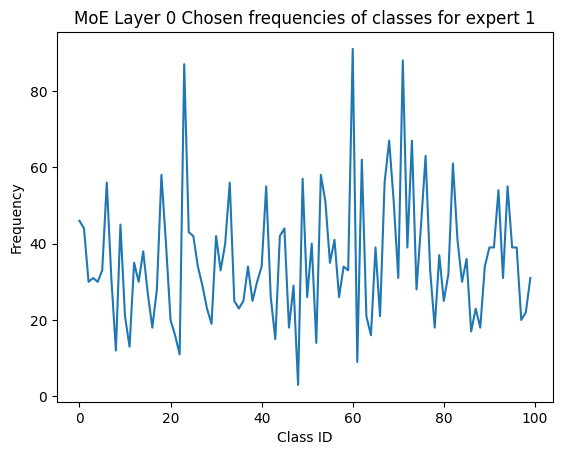

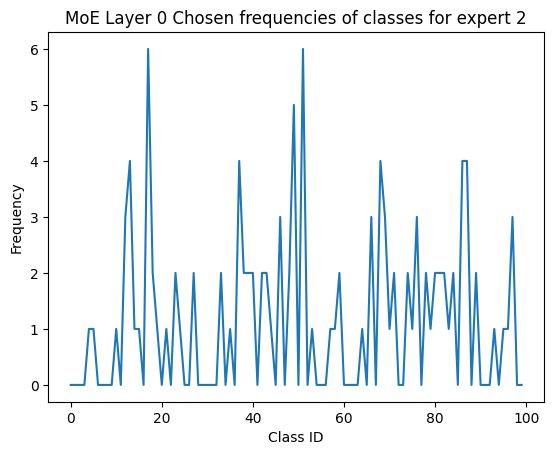

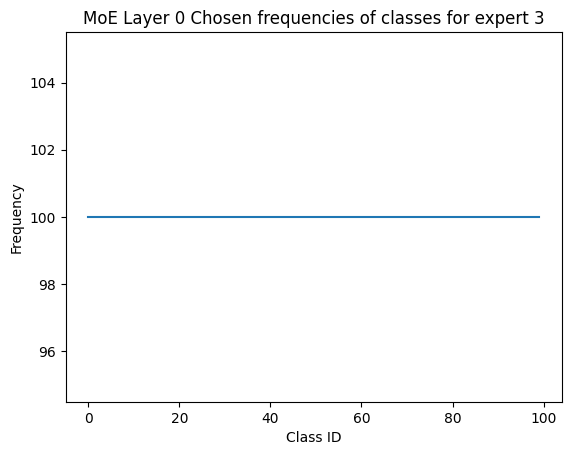

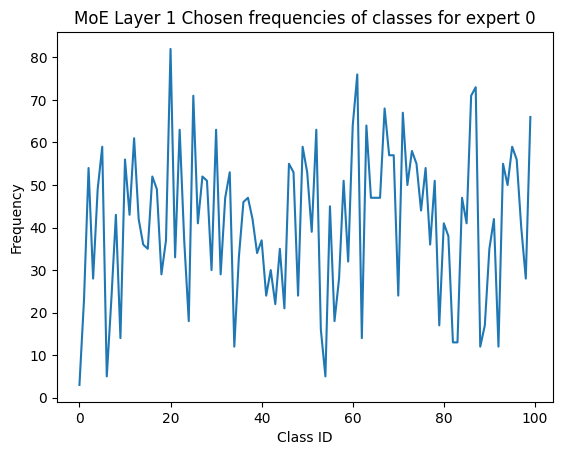

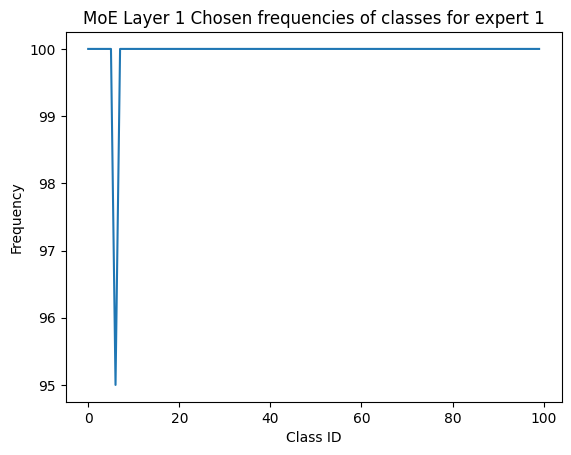

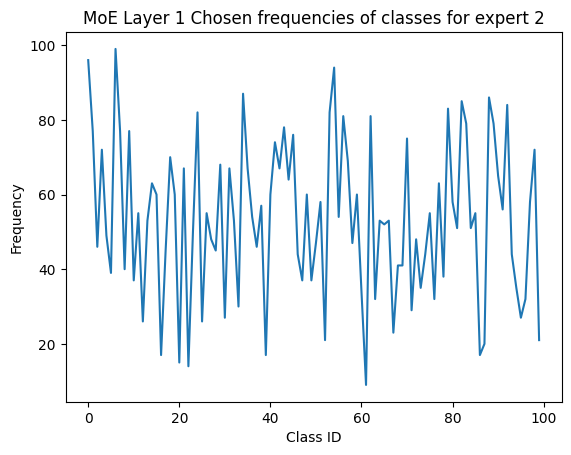

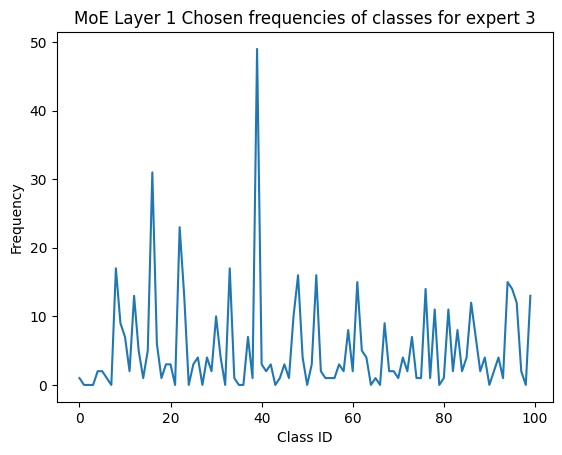

In [2]:
import matplotlib.pyplot as plt
import numpy as np

all_freq_from_experts_to_classes = np.load('/datapool/workspace/3024hlh/saved/log/Imbalance_CIFAR100_LT_ResNet32MoE/0911_140821/selected_experts_log_part_1_epoch_200.npy')
print(all_freq_from_experts_to_classes.shape)

for idx, freq_from_experts_to_classes in enumerate(all_freq_from_experts_to_classes):
    num_expert = freq_from_experts_to_classes.shape[0]
    classes_id = np.arange(100)
    for expert_id, freq_from_expert_to_classes in enumerate(freq_from_experts_to_classes):
        description = f'MoE layer {idx}: Chosen frequencies of classes for expert {expert_id}'
        plt.plot(classes_id, freq_from_expert_to_classes)
        plt.xlabel('Class ID')
        plt.ylabel('Frequency')
        plt.title(description)
        plt.show()

# Settings
* 4 experts
* top 2 selected
# Observation 
* 在两个使用了MoE的nn.Conv中(CustomizedMoEBasicBlock的第二个nn.Conv Module)，可以观察到
    * 总有一个expert会所有的class选中（也就是frequency为100，即一个class里的所有的examples)
        * Why?
    * 其中有两个expert表现出了一种反对称互补的特点。比如Layer 1的Expert 0和2。这样的expert或许有一定的diversity。
    * 有一个expert不怎么活跃。例如Layer 0的Expert 2和Layer 1的Expert 3。
        * Why?
# To Do
* Visulization of scores of gates.